In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(style="darkgrid")

### Orange

In [2]:
# loading data (Orange)
data_orange = pd.read_csv('../Data & Outputs/Orange/original_data.csv')
data_orange = data_orange.drop(columns='phone number').copy()
data_orange

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


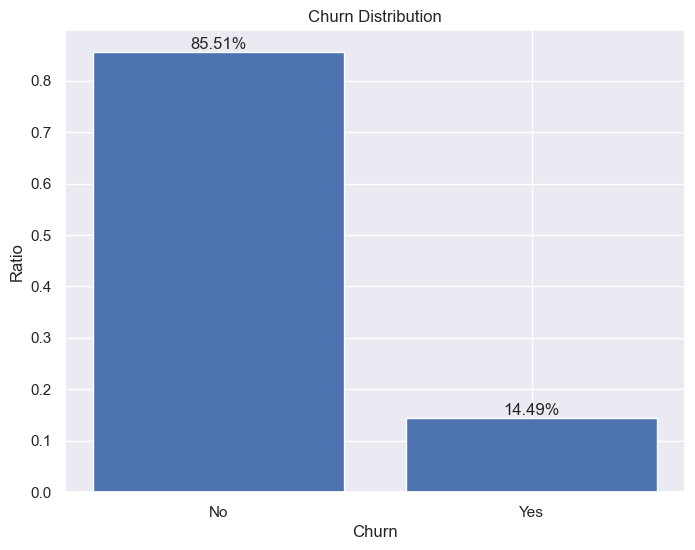

In [3]:
#displaying churn ratio

churn_counts = data_orange.churn.value_counts().rename({False: 'No', True: 'Yes'}).copy()
total = churn_counts.sum()
churn_ratios = churn_counts / total

plt.figure(figsize=(8, 6))
bars = plt.bar(churn_ratios.index, churn_ratios.values)
plt.xlabel('Churn')
plt.ylabel('Ratio')
plt.title('Churn Distribution')

for bar, ratio in zip(bars, churn_ratios):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{ratio:.2%}', ha='center', va='bottom')
plt.show()

In [4]:
data_orange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [5]:
data_orange.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [6]:
# converting churn column from boolean to integer
data_orange['churn'] = data_orange['churn'].astype(int)
data_orange['churn'].value_counts(), data_orange['international plan'].value_counts(), data_orange['voice mail plan'].value_counts()

(churn
 0    2850
 1     483
 Name: count, dtype: int64,
 international plan
 no     3010
 yes     323
 Name: count, dtype: int64,
 voice mail plan
 no     2411
 yes     922
 Name: count, dtype: int64)

In [7]:
oe = OrdinalEncoder()
col_to_encode = data_orange.select_dtypes(include='object').columns.tolist()
df_encoded = data_orange.copy()
df_encoded[col_to_encode] = oe.fit_transform(df_encoded[col_to_encode])
df_encoded

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16.0,128,415,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35.0,107,415,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31.0,137,415,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35.0,84,408,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36.0,75,415,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3.0,192,415,0.0,1.0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49.0,68,415,0.0,0.0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39.0,28,510,0.0,0.0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6.0,184,510,1.0,0.0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


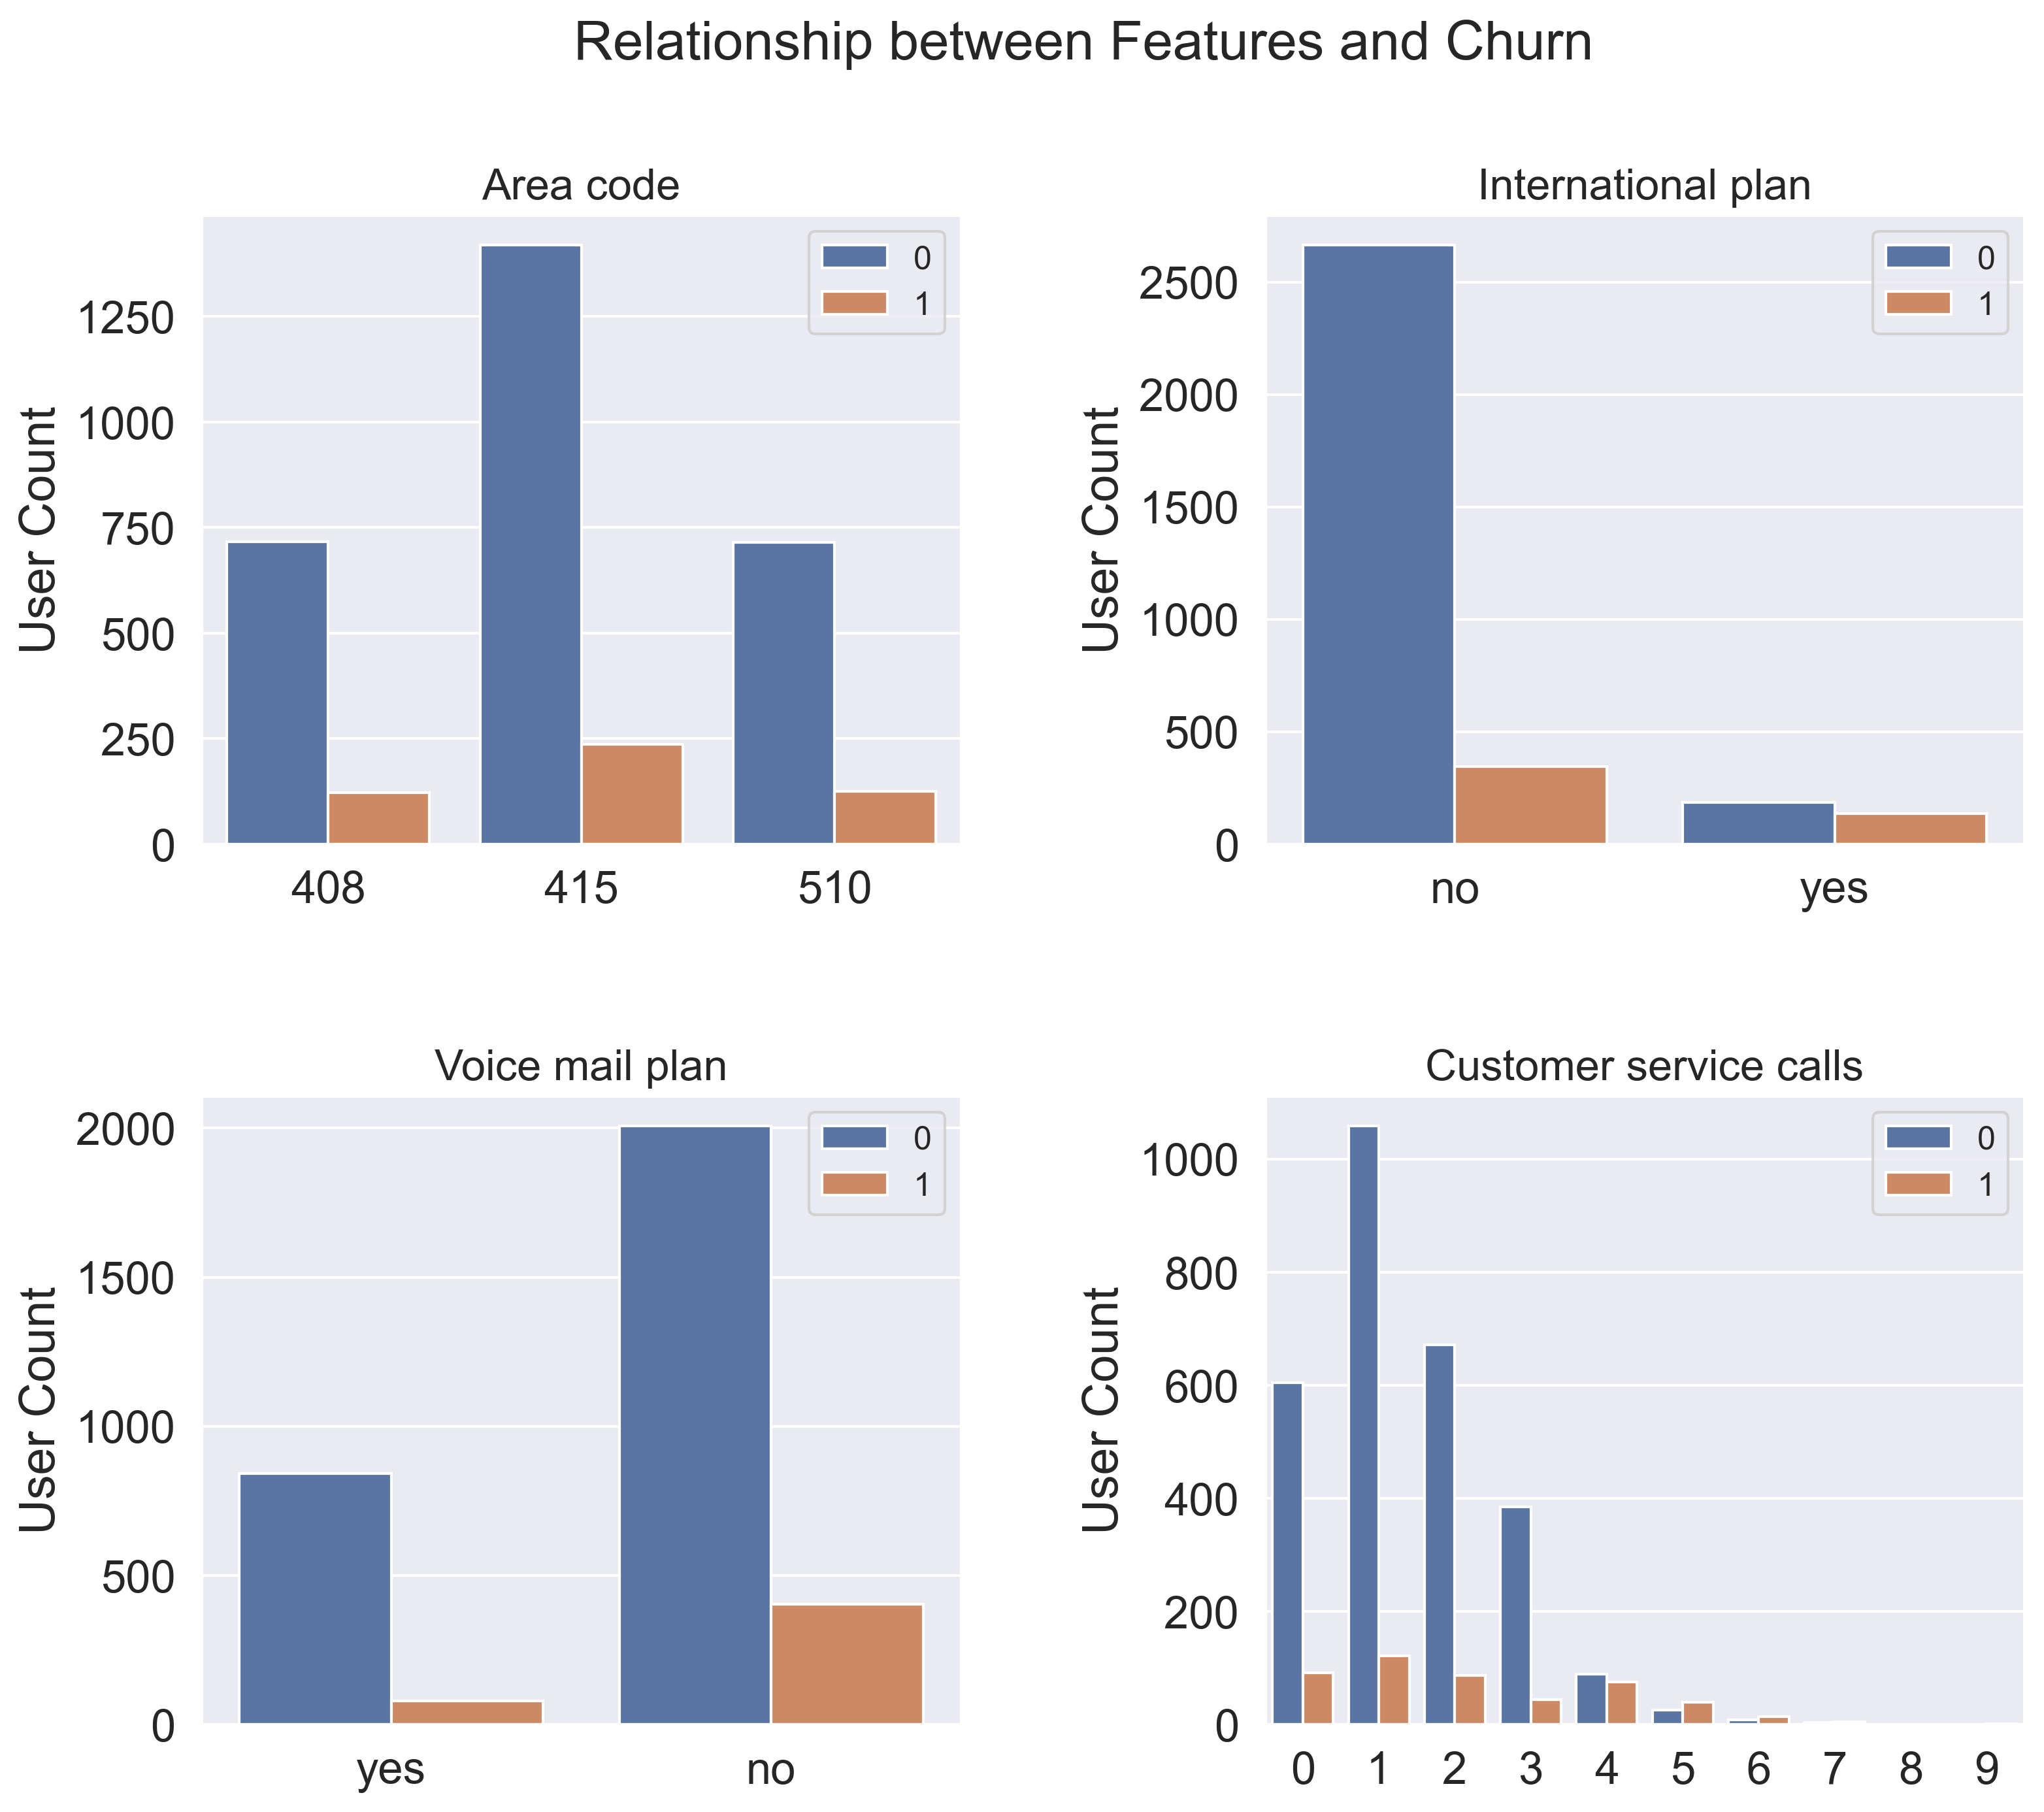

In [8]:
# plotting relations of some features with the target
features = ['area code', 'international plan', 'voice mail plan', 'customer service calls']
n_rows = int(np.ceil(len(features)/2))
n_cols = 2
sns.set_theme(style="darkgrid", font_scale=1.5)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12,5*n_rows), dpi=300)
axes = axes.flatten()

# countplot for each feature
for i, feature in enumerate(features):
    ax = sns.countplot(x=feature, hue='churn', data=data_orange, ax=axes[i])
    ax.set_xlabel(None)
    ax.set_ylabel('User Count')
    ax.set_title(f'{feature.capitalize()}', fontsize=16)
    ax.legend(loc='upper right', fontsize=12)
     
# figure title
fig.suptitle('Relationship between Features and Churn', fontsize=20)

# remove extra whitespace between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [9]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   float64
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   float64
 4   voice mail plan         3333 non-null   float64
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [10]:
df_encoded.to_csv('../Data & Outputs/Orange/df_encoded.csv', index=False)

In [11]:
# Normalization
scaler = MinMaxScaler().set_output(transform="pandas") 
scaler.fit(df_encoded)
df_normalized = scaler.transform(df_encoded)

In [12]:
df_normalized.describe()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.521188,0.413491,0.286102,0.096910,0.276628,0.158804,0.512472,0.608701,0.512446,0.552599,0.588908,0.552687,0.477870,0.472590,0.478143,0.511865,0.223972,0.511960,0.173651,0.144914
std,0.296498,0.164554,0.415405,0.295879,0.447398,0.268399,0.155266,0.121631,0.155255,0.139439,0.117192,0.139459,0.136024,0.137807,0.136035,0.139592,0.123061,0.139588,0.146166,0.352067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280000,0.301653,0.000000,0.000000,0.000000,0.000000,0.409635,0.527273,0.409624,0.458070,0.511765,0.458104,0.386767,0.380282,0.387328,0.425000,0.150000,0.425926,0.111111,0.000000
50%,0.520000,0.413223,0.068627,0.000000,0.000000,0.000000,0.511403,0.612121,0.511402,0.553753,0.588235,0.553866,0.478752,0.471831,0.478781,0.515000,0.200000,0.514815,0.111111,0.000000
75%,0.780000,0.520661,1.000000,0.000000,1.000000,0.392157,0.616876,0.690909,0.616868,0.646962,0.670588,0.647040,0.570468,0.563380,0.570831,0.605000,0.300000,0.605556,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


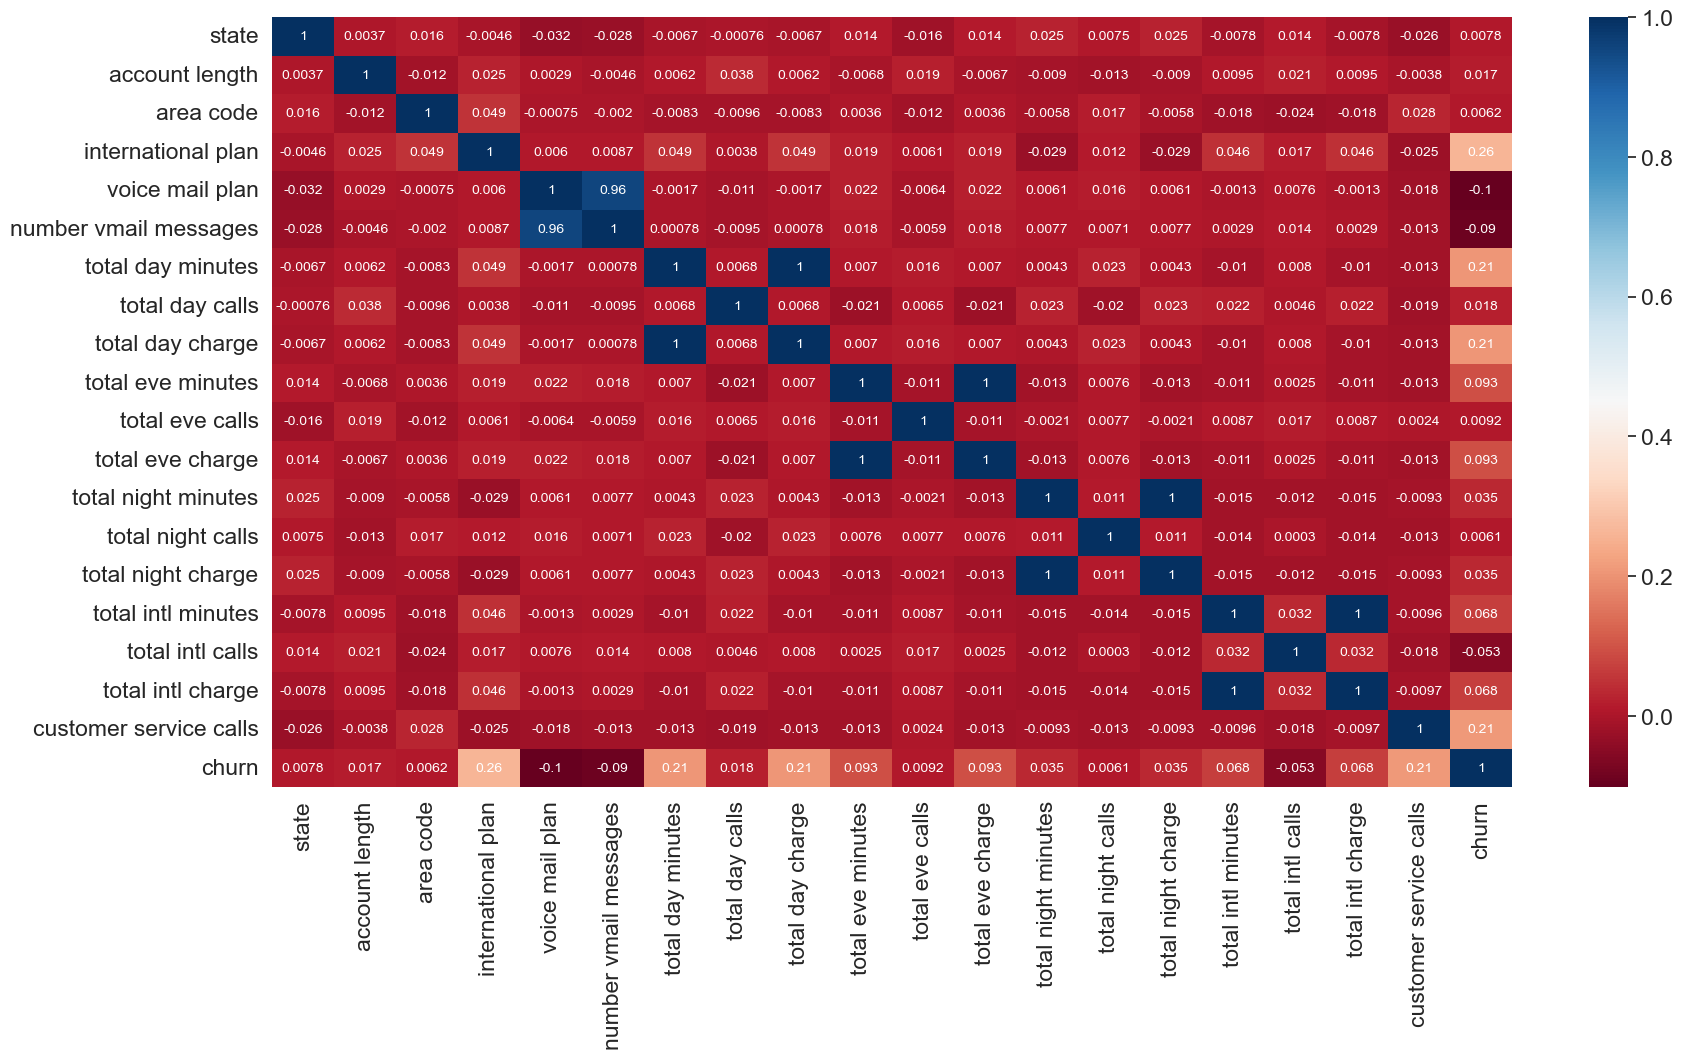

In [13]:
# Correlation
corr = df_normalized.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='RdBu', annot_kws={"size": 10, "color": "white"})
plt.show()

In [14]:
df_normalized.to_csv('../Data & Outputs/Orange/df_normalized.csv', index=False)

### IBM Watson

In [15]:
# loading data (IBM)
data_ibm = pd.read_csv('../Data & Outputs/IBM/original_data.csv')
data_ibm = data_ibm.drop(columns='customerID').copy()
data_ibm

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
data_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
data_ibm.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [18]:
data_ibm['TotalCharges'] = pd.to_numeric(data_ibm['TotalCharges'], errors='coerce')
data_ibm.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
df = data_ibm.dropna(subset=["TotalCharges"])
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
oe = OrdinalEncoder()

# columns to be encoded
col_to_encode = data_ibm.select_dtypes(include='object').columns.tolist()

df_encoded = data_ibm.copy()

df_encoded[col_to_encode] = oe.fit_transform(df_encoded[col_to_encode])


In [21]:
df_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


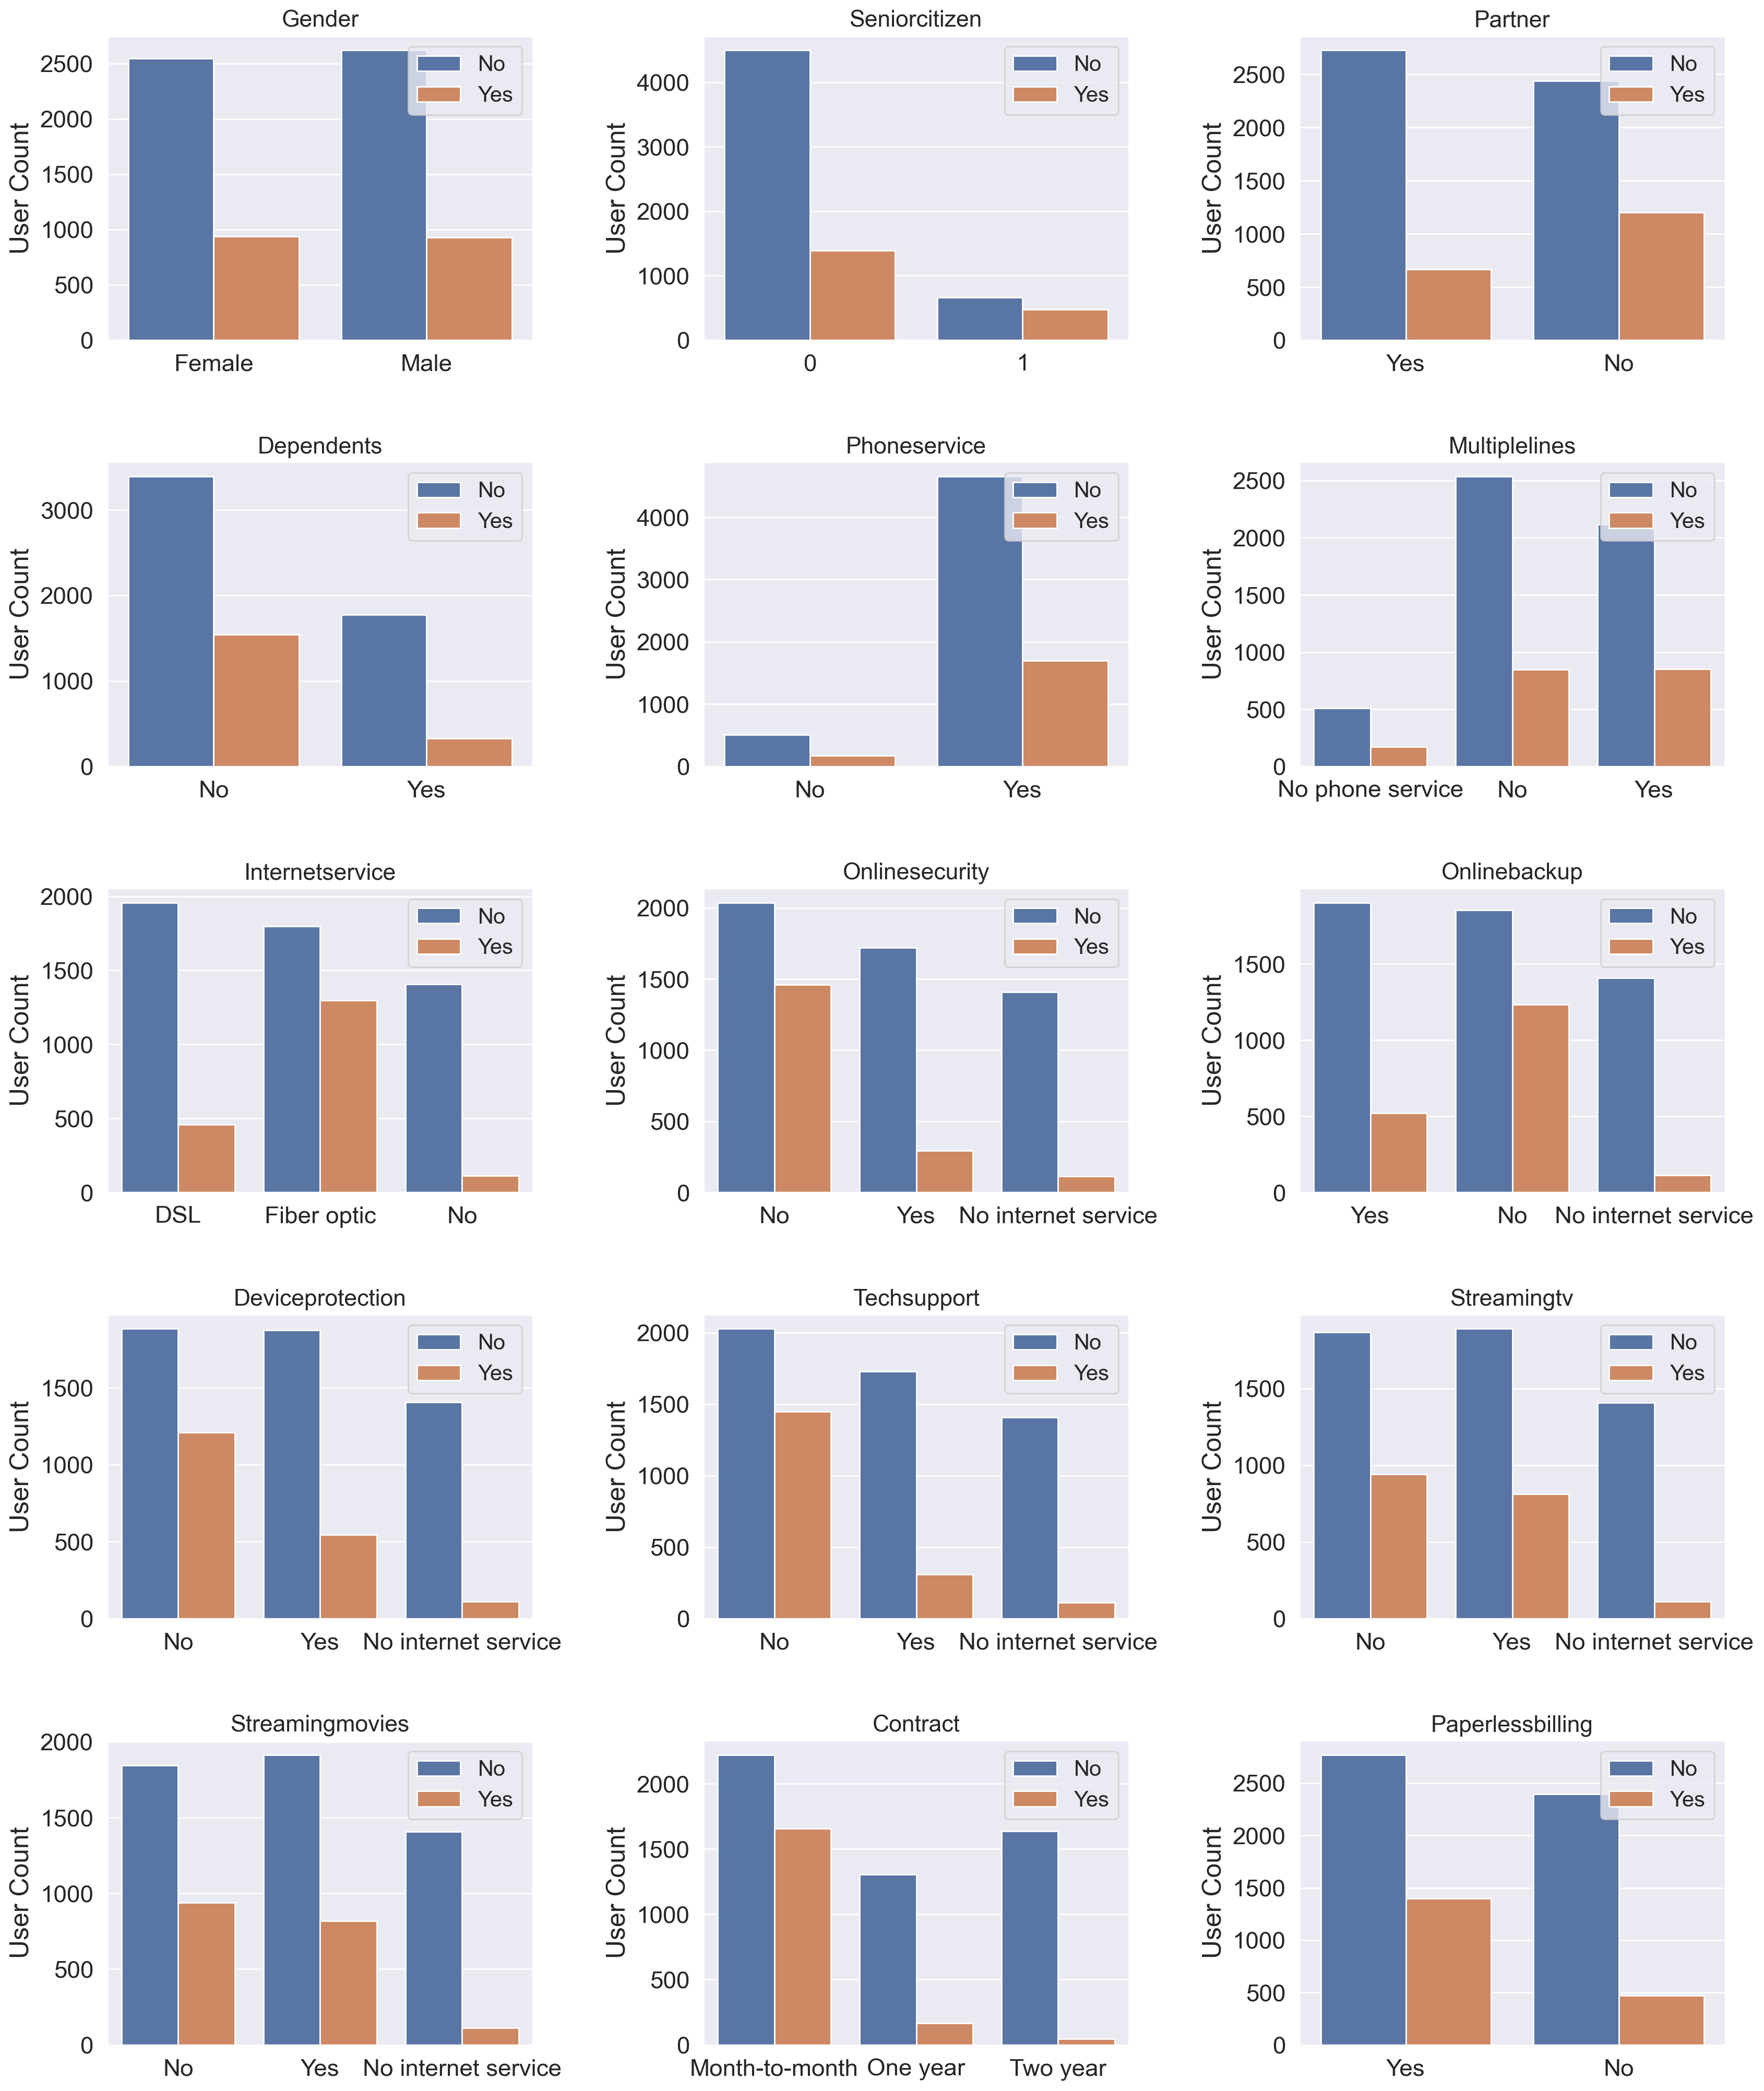

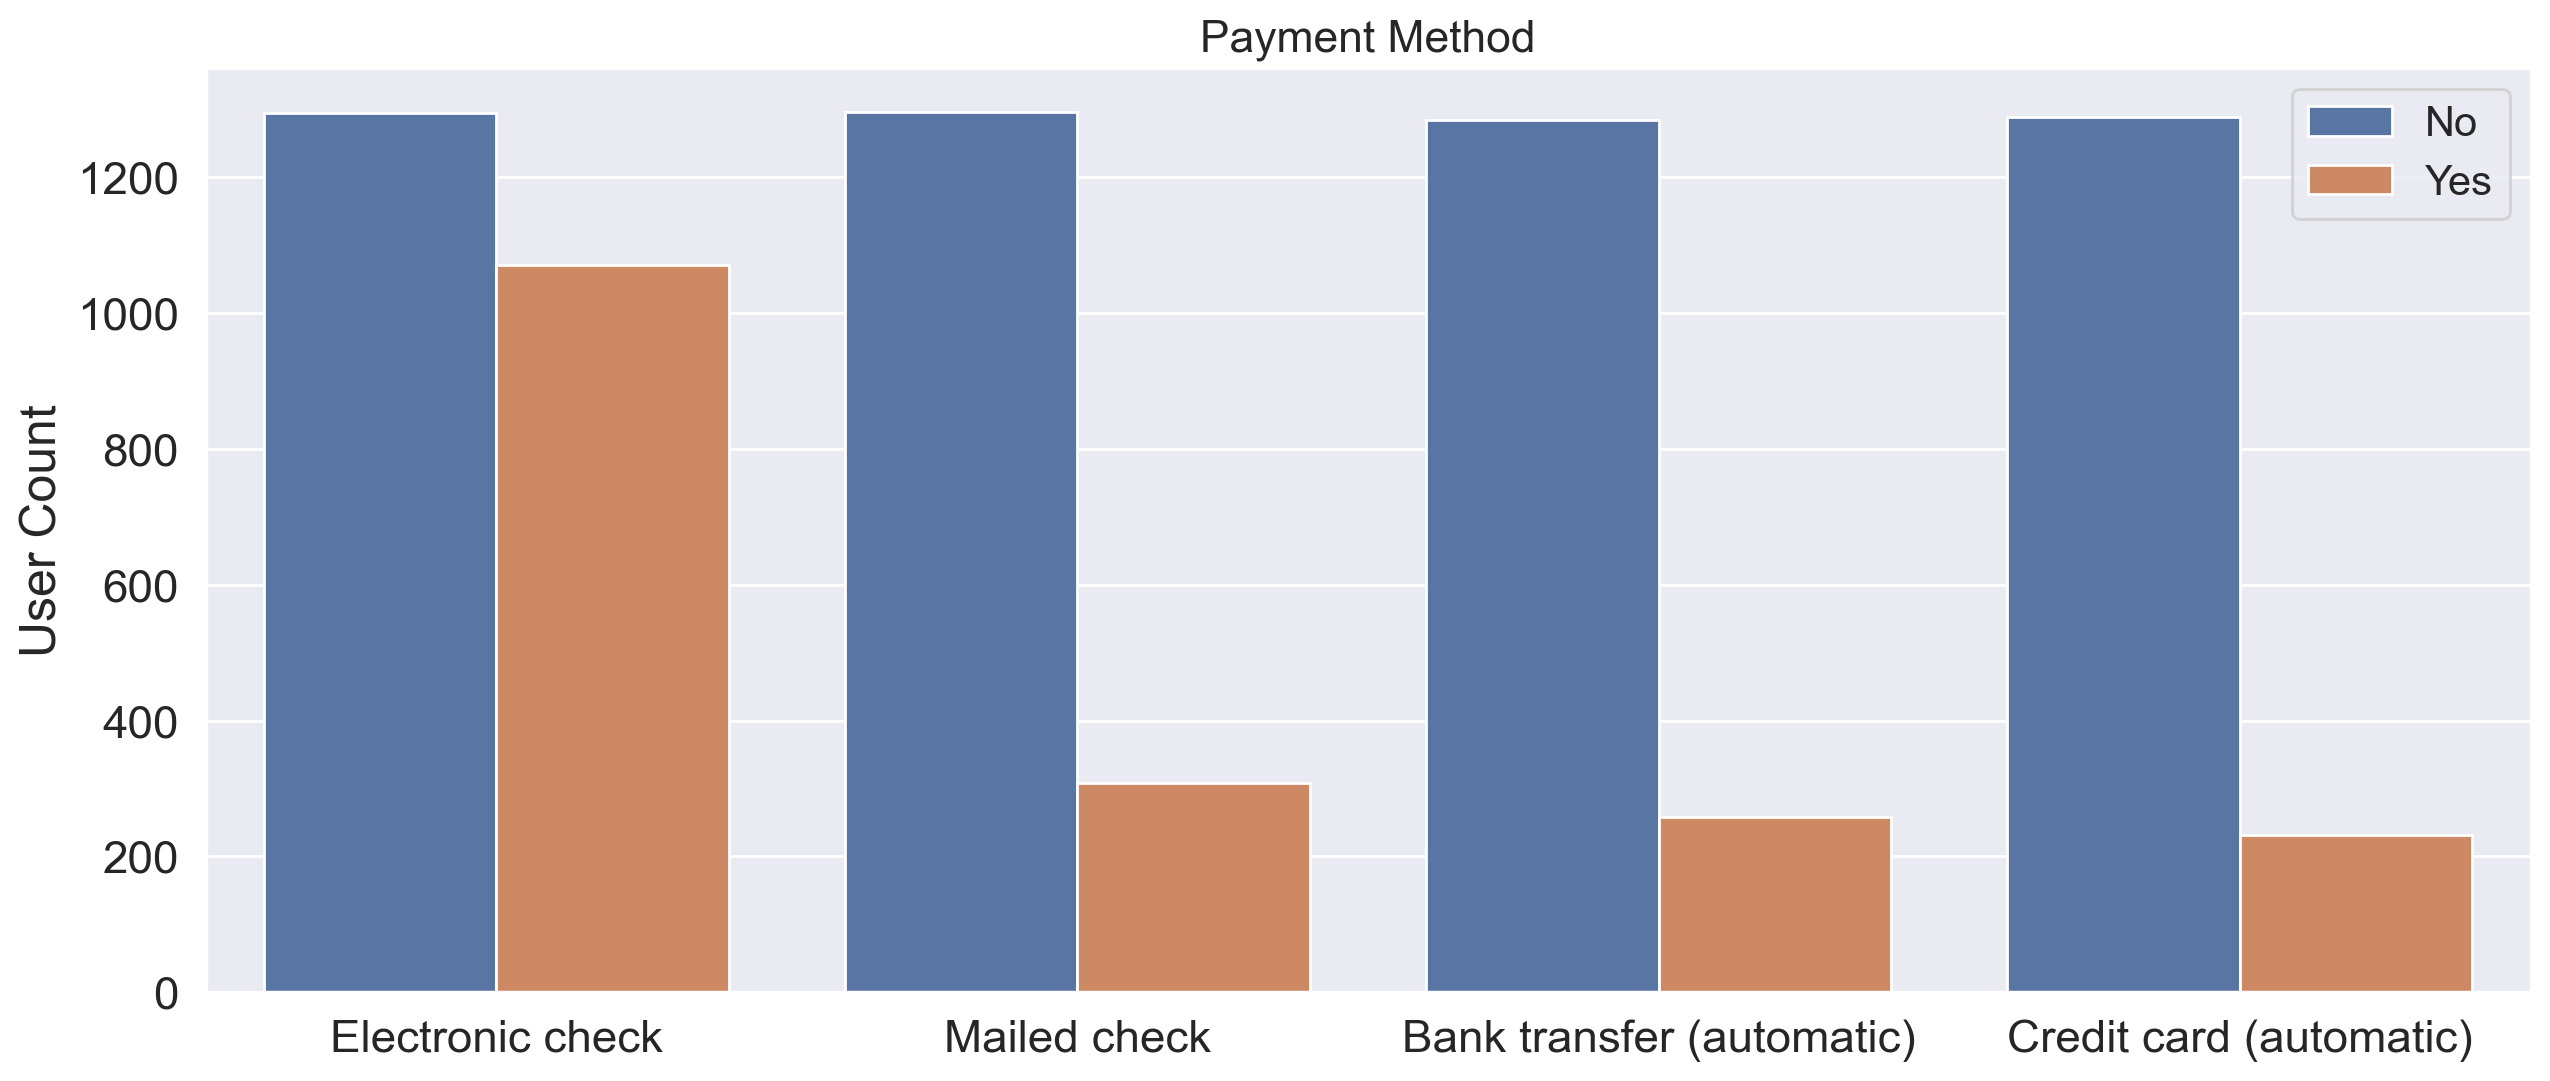

In [22]:
# plotting relations of some features with the target
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 
                 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 
                 'Contract', 'PaperlessBilling']

sns.set_theme(style="darkgrid", font_scale=1.5)

# calculate number of rows required
n_rows = int(np.ceil(len(features)/3))

fig, axes = plt.subplots(n_rows, 3, figsize=(20,5*n_rows), dpi=200)
axes = axes.flatten()

# create countplot for each feature
for i, feature in enumerate(features):
    ax = sns.countplot(x=feature, hue='Churn', data=df, ax=axes[i])
    ax.set_xlabel(None)
    ax.set_ylabel('User Count')
    ax.set_title(f'{feature.capitalize()}', fontsize=16)
    ax.legend(loc='upper right', fontsize=15)

# remove extra whitespace between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

fig = plt.figure(figsize=(15,6), dpi=200)
ax = sns.countplot(x='PaymentMethod', hue='Churn', data=df);
ax.set_xlabel(None)
ax.set_ylabel('User Count')
ax.set_title('Payment Method', fontsize=16)
ax.legend(loc='upper right', fontsize=15)
plt.show()

In [23]:
#rename Churn column to churn for later use
df_encoded = df_encoded.rename(columns={'Churn': 'churn'})

In [24]:
df_encoded.to_csv('../Data & Outputs/IBM/df_encoded.csv', index=False)

In [25]:
scaler = MinMaxScaler().set_output(transform="pandas") 
scaler.fit(df_encoded)
df_normalized = scaler.transform(df_encoded)

In [26]:
df_normalized.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,0.449599,0.903166,0.470254,0.436462,0.395002,0.453216,0.452222,0.398552,0.492688,0.496237,0.345236,0.592219,0.524776,0.462803,0.261309,0.265370
std,0.500013,0.368612,0.499748,0.458110,0.341104,0.295752,0.474277,0.368898,0.429924,0.440081,0.439974,0.430775,0.442501,0.442545,0.416878,0.491457,0.356035,0.299403,0.261571,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.171642,0.044155,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.402778,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,0.666667,0.518408,0.159090,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.666667,0.712438,0.435719,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


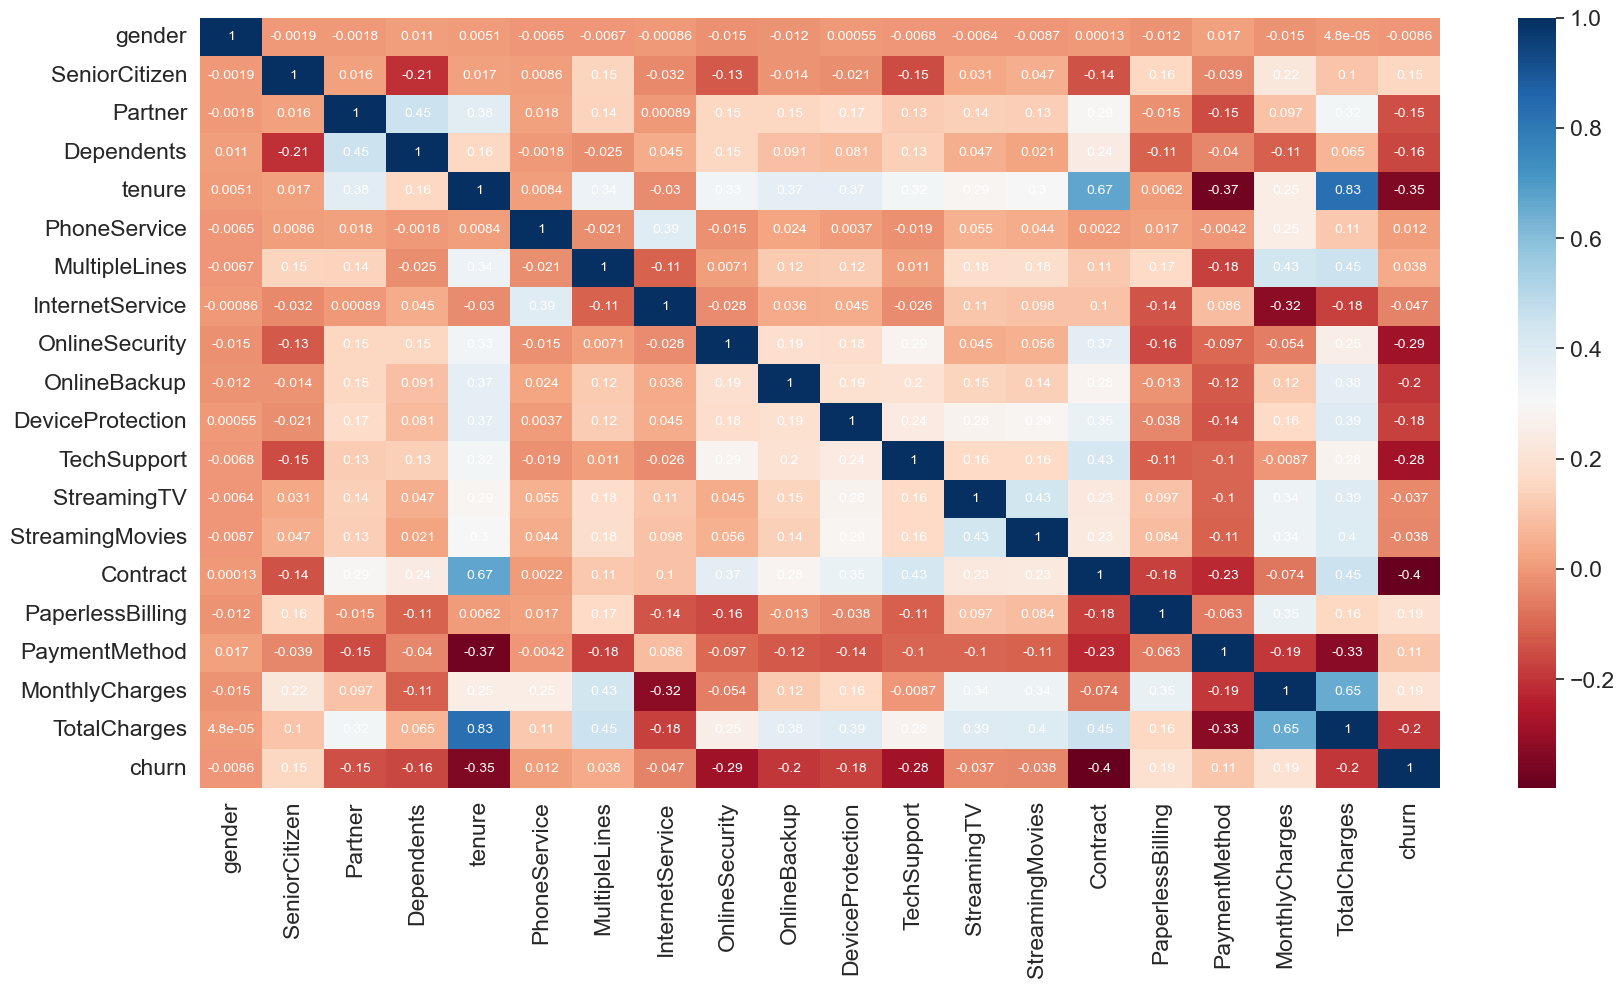

In [27]:
# Correlation
corr = df_normalized.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='RdBu', annot_kws={"size": 10, "color": "white"})
plt.show()

In [28]:
df_normalized.to_csv('../Data & Outputs/IBM/df_normalized.csv', index=False)